In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Zad
Wykonaj klasyfikację danych MNIST za pomocą regresji logistycznej.

In [2]:
np.random.seed(42)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression

# mnist = fetch_mldata('MNIST original')
# X = mnist.data.astype('float64')
# y = mnist.target

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape, " ", y.shape)



(70000, 784)   (70000,)


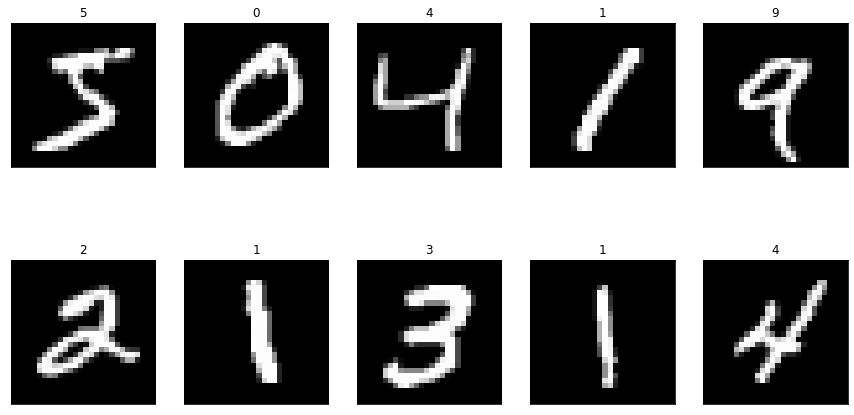

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y, X, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

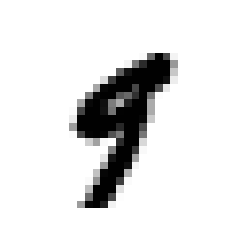

In [7]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

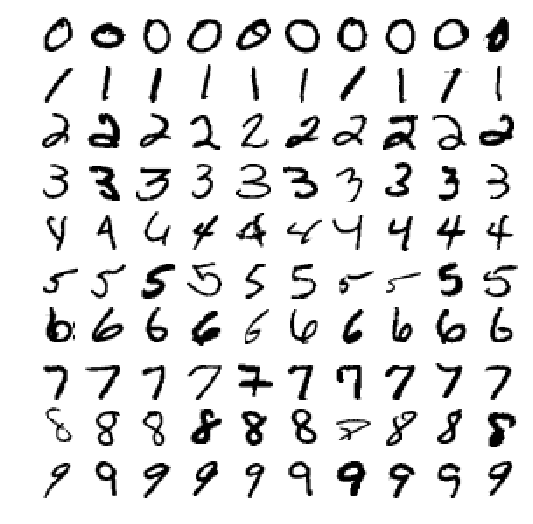

In [7]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
seed=123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


# Zad
Jeżeli nie zredukujesz wymiarów to będzie się liczyć bardzo długo (odradzam sprawdzanie).

In [9]:
# clf = LogisticRegression(random_state=42)
# clf.fit(X_train, y_train)
# from sklearn.metrics import f1_score
# f1_score(y_true = y_tes , y_pred = clf.predict(X_test))

# Zad
Wyznacz optymalną ilość współrzędnych w PCA


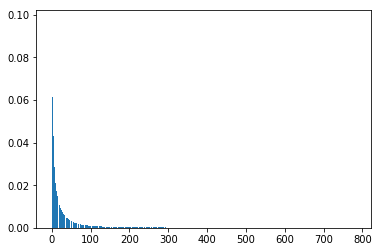

In [10]:
from sklearn.decomposition import PCA


# Zad
Zredukuj wymiar do **n_components=10** i wykonaj klasyfikację.

Jakie uzyskałeś **accuracy_score**

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# scoring on the scaled test set
print("Scaled test set accurac: {:.2f}".format( metrics.accuracy_score( y_pred = clf.predict(X_test_pca), y_true = y_test)) )

Scaled test set accurac: 0.78


# Zad
Wykonaj analogiczne zadanie za pomoca: 

```python
from sklearn.pipeline import Pipeline
```

# Zad.

Narysuj zależność ilości wymiarów i miary Accuracy dla

**
n_components = 2,...,20
**

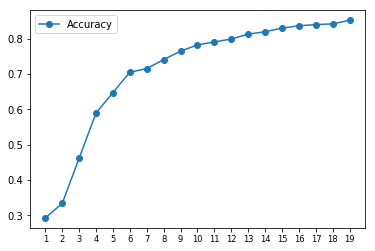

In [16]:
t=range(1,20)

plt.plot(accuracy_array, "o-", label="Accuracy")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.

Sprawdź

**
n_components = 2,...,20
**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
print("Best parameters: ", grid.best_params_)
print("Test Accuracy: {:.2f}".format( metrics.accuracy_score( y_pred = grid.predict(X_test), y_true = y_test) ))

Best parameters:  {'pca__n_components': 19, 'scaler': None}
Test Accuracy: 0.85
